In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution
import warnings

In [2]:
#
# Your Exponential Function
#
def func(x, a, b, c):
    return a * np.exp(b * x) + c
#y = 1.267326331·10-42 e5.318989729·10-2 x

In [3]:
# function for genetic algorithm to minimize (sum of squared error)
# https://stackoverflow.com/questions/56164659/scipy-curve-fit-do-not-converge-even-if-i-iteratively-change-initial-guess
#
# Notice I've used the NORMALIZED data here
# The REGULAR data was too large in value and range
# Normalizing made it easier for the algorithm to converge
#
def sumOfSquaredError(parameterTuple):
    warnings.filterwarnings("ignore") # do not print warnings by genetic algorithm
    val = func(Xnorm, *parameterTuple)
    return np.sum((ynorm - val) ** 2.0)


def generate_Initial_Parameters():
    minY = min(ynorm)
    maxY = max(ynorm)

    parameterBounds = []
    parameterBounds.append([0.0, 5.0]) # search bounds for a
    parameterBounds.append([5.0, 15.0]) # search bounds for b
    parameterBounds.append([minY, maxY]) # search bounds for offset

    # "seed" the numpy random number generator for repeatable results
    result = differential_evolution(sumOfSquaredError, parameterBounds, seed=3)
    return result.x

def printModelPredictions(Xdata, ydata, popt):
    modelPredictions = func(Xdata, *popt) 
    absError = modelPredictions - ydata

    SE = np.square(absError) # squared errors
    MSE = np.mean(SE) # mean squared errors
    RMSE = np.sqrt(MSE) # Root Mean Squared Error, RMSE
    Rsquared = 1.0 - (np.var(absError) / np.var(ydata))

    print()
    print('RMSE:', RMSE)
    print('R-squared:', Rsquared)

    print()

In [4]:
#
# Read the data in and convert to an array
#
data = pd.read_csv('./coralsyearcount.csv');
arr = data.to_numpy(dtype=np.float128);
arr

array([[2.0180e+03, 2.2274e+04],
       [2.0170e+03, 5.3033e+04],
       [2.0160e+03, 3.2030e+04],
       [2.0150e+03, 3.4057e+04],
       [2.0140e+03, 4.1286e+04],
       [2.0130e+03, 1.5140e+04],
       [2.0120e+03, 1.8670e+04],
       [2.0110e+03, 3.9207e+04],
       [2.0100e+03, 4.5804e+04],
       [2.0090e+03, 1.8932e+04],
       [2.0080e+03, 5.6232e+04],
       [2.0070e+03, 4.3278e+04],
       [2.0060e+03, 4.2534e+04],
       [2.0050e+03, 4.4537e+04],
       [2.0040e+03, 4.4943e+04],
       [2.0030e+03, 3.2894e+04],
       [2.0020e+03, 3.1268e+04],
       [2.0010e+03, 1.0645e+04],
       [2.0000e+03, 3.2230e+04],
       [1.9990e+03, 4.6960e+03],
       [1.9980e+03, 6.7200e+03],
       [1.9970e+03, 5.8080e+03],
       [1.9960e+03, 3.3210e+03],
       [1.9950e+03, 3.4770e+03],
       [1.9940e+03, 6.5880e+03],
       [1.9930e+03, 4.7450e+03],
       [1.9920e+03, 5.5300e+03],
       [1.9910e+03, 7.3030e+03],
       [1.9900e+03, 3.6120e+03],
       [1.9890e+03, 1.3810e+03],
       [1.

In [5]:
# 
# extract the X data
#
X = arr[:, 0]

In [6]:
#
# normalize the data
# (values between 0.0 and 1.0)
#
print(X.min())
print(X.max())
Xnorm = (X-X.min())/(X.max()-X.min())
Xnorm

1842.0
2018.0


array([1.        , 0.99431818, 0.98863636, 0.98295455, 0.97727273,
       0.97159091, 0.96590909, 0.96022727, 0.95454545, 0.94886364,
       0.94318182, 0.9375    , 0.93181818, 0.92613636, 0.92045455,
       0.91477273, 0.90909091, 0.90340909, 0.89772727, 0.89204545,
       0.88636364, 0.88068182, 0.875     , 0.86931818, 0.86363636,
       0.85795455, 0.85227273, 0.84659091, 0.84090909, 0.83522727,
       0.82954545, 0.82386364, 0.81818182, 0.8125    , 0.80681818,
       0.80113636, 0.79545455, 0.78977273, 0.78409091, 0.77840909,
       0.77272727, 0.76704545, 0.76136364, 0.75568182, 0.75      ,
       0.74431818, 0.73863636, 0.73295455, 0.72727273, 0.72159091,
       0.71590909, 0.71022727, 0.70454545, 0.69886364, 0.69318182,
       0.6875    , 0.68181818, 0.67613636, 0.67045455, 0.66477273,
       0.65909091, 0.65340909, 0.64772727, 0.64204545, 0.63636364,
       0.63068182, 0.625     , 0.61931818, 0.61363636, 0.60795455,
       0.60227273, 0.59659091, 0.59090909, 0.58522727, 0.5625 

In [7]:
# 
# extract the y data
#
y = arr[:, 1]

In [8]:
#
# normalize the data
# (values between 0.0 and 1.0)
#
print(y.min())
print(y.max())
ynorm = (y-y.min())/(y.max()-y.min())
ynorm

1.0
56232.0


array([3.96098238e-01, 9.43109673e-01, 5.69596842e-01, 6.05644573e-01,
       7.34203553e-01, 2.69228717e-01, 3.32005477e-01, 6.97231065e-01,
       8.14550693e-01, 3.36664829e-01, 1.00000000e+00, 7.69628852e-01,
       7.56397717e-01, 7.92018637e-01, 7.99238854e-01, 5.84962032e-01,
       5.56045598e-01, 1.89290605e-01, 5.73153599e-01, 8.34948694e-02,
       1.19489250e-01, 1.03270438e-01, 5.90421654e-02, 6.18164358e-02,
       1.17141790e-01, 8.43662748e-02, 9.83265459e-02, 1.29857196e-01,
       6.42172467e-02, 2.45416229e-02, 1.54007576e-02, 9.95891946e-03,
       1.47249738e-02, 2.40436770e-02, 2.29232985e-02, 1.43159467e-02,
       2.79916772e-02, 3.67946506e-02, 2.13405417e-02, 6.38437872e-03,
       9.03416265e-03, 1.05280006e-02, 9.46097348e-03, 1.15772439e-02,
       7.41583824e-03, 7.78929772e-03, 9.88778432e-03, 1.22530277e-02,
       7.71816258e-03, 1.00478384e-02, 2.16428660e-02, 1.23597304e-02,
       1.31066494e-02, 1.69657306e-02, 2.56086500e-02, 1.48672440e-02,
      

In [9]:
#
# by default, differential_evolution completes by calling curve_fit() using parameter bounds
#
geneticParameters = generate_Initial_Parameters()
geneticParameters

array([2.59747626e-05, 1.03813484e+01, 0.00000000e+00])

In [10]:
#
# now call curve_fit with/witout geneticParameters,
# popt - without geneticParameters
# POPT - with geneticParameters
#
popt, pcov = curve_fit(func, Xnorm, ynorm, maxfev=1000)
POPT, PCOV = curve_fit(func, Xnorm, ynorm, geneticParameters)
print('without parameters:', popt)
print('GeneticBounds parameters:', POPT)
print()


without parameters: [-2.31856251e+03 -2.07383400e-04  2.31838018e+03]
GeneticBounds parameters: [ 4.47932383e-05  9.84813971e+00 -1.58798757e-02]



In [11]:
    #
    # Note: Higher R-squared values are good. Mostly we want 90%
    # Our 73% below is not bad
    # https://blog.minitab.com/blog/adventures-in-statistics-2/regression-analysis-how-do-i-interpret-r-squared-and-assess-the-goodness-of-fit
    #
printModelPredictions(X, y, popt)
printModelPredictions(Xnorm, ynorm, POPT)


RMSE: 13191.383823949090231
R-squared: 0.0013526805587092325094


RMSE: 0.11605359677666689428
R-squared: 0.7250632607228712146



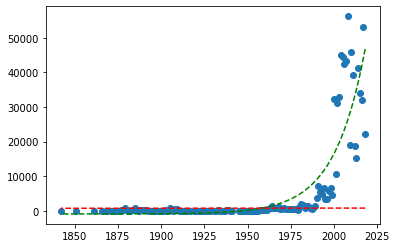

In [12]:
#
# Plot the initial values in plt.scatter=blue
# Plot the 'bad' estimate with (popt)=red
# Plot the 'good' estimate with (POPT)=green
#
plt.scatter(X, y);
plt.plot(X, func(Xnorm, *POPT)*y.max(), 'g--',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(POPT))
plt.plot(X, func(X, *popt), 'r--',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(POPT))
plt.show()